In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25a6578304103d1ad28054c2d4b1650c


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kieta
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | lecco
Processing Record 5 of Set 1 | san sebastian
Processing Record 6 of Set 1 | kirya
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | grindavik
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | san angelo
Processing Record 13 of Set 1 | grand centre
City not found. Skipping...
Processing Record 14 of Set 1 | haines junction
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | solovetskiy
City not found. Skipping...
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | bluff


Processing Record 35 of Set 4 | sibolga
Processing Record 36 of Set 4 | moose factory
Processing Record 37 of Set 4 | sukhoverkovo
City not found. Skipping...
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | buala
Processing Record 40 of Set 4 | boa vista
Processing Record 41 of Set 4 | coruripe
Processing Record 42 of Set 4 | mekhe
Processing Record 43 of Set 4 | manzhouli
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | chupei
City not found. Skipping...
Processing Record 47 of Set 4 | goderich
Processing Record 48 of Set 4 | rocha
Processing Record 49 of Set 4 | qaanaaq
Processing Record 50 of Set 4 | devonport
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | bandarbeyla
Processing Record 3 of Set 5 | rawah
Processing Record 4 of Set 5 | salym
Processing Record 5 of Set 5 | sri aman
Processing Record 6 of Set 5 | aras
Processing Record 7 of Set 5 | manicore
Processing 

Processing Record 21 of Set 8 | san jeronimo
Processing Record 22 of Set 8 | okakarara
Processing Record 23 of Set 8 | yuncheng
Processing Record 24 of Set 8 | labuhan
Processing Record 25 of Set 8 | bani walid
Processing Record 26 of Set 8 | aligudarz
Processing Record 27 of Set 8 | mar del plata
Processing Record 28 of Set 8 | santa rosa
Processing Record 29 of Set 8 | naze
Processing Record 30 of Set 8 | coahuayana
Processing Record 31 of Set 8 | bulawayo
Processing Record 32 of Set 8 | ust-maya
Processing Record 33 of Set 8 | valleyview
Processing Record 34 of Set 8 | panguna
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | tingo maria
Processing Record 37 of Set 8 | georgetown
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | shimoda
Processing Record 40 of Set 8 | kodiak
Processing Record 41 of Set 8 | trinidad
Processing Record 42 of Set 8 | palaikastron
Processing Record 43 of Set 8 | ardmore
Processing Record 44 of Set 8 | maputo

Processing Record 13 of Set 12 | svetlyy
Processing Record 14 of Set 12 | nyurba
Processing Record 15 of Set 12 | poum
Processing Record 16 of Set 12 | sungai besar
Processing Record 17 of Set 12 | mulanje
Processing Record 18 of Set 12 | montlucon
Processing Record 19 of Set 12 | cidreira
Processing Record 20 of Set 12 | artyshta
Processing Record 21 of Set 12 | nabire
Processing Record 22 of Set 12 | nhulunbuy
Processing Record 23 of Set 12 | mweka
Processing Record 24 of Set 12 | huilong
Processing Record 25 of Set 12 | otjimbingwe
Processing Record 26 of Set 12 | porto novo
Processing Record 27 of Set 12 | lousa
Processing Record 28 of Set 12 | east london
Processing Record 29 of Set 12 | ye
City not found. Skipping...
Processing Record 30 of Set 12 | lungi
Processing Record 31 of Set 12 | pasco
Processing Record 32 of Set 12 | puerto escondido
Processing Record 33 of Set 12 | larreynaga
Processing Record 34 of Set 12 | sinnamary
Processing Record 35 of Set 12 | qostanay
Processing

In [9]:
len(city_data)

578

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kieta,-6.22,155.63,78.37,78,8,1.99,PG,2020-05-07 18:50:44
1,Punta Arenas,-53.15,-70.92,46.40,93,90,8.05,CL,2020-05-07 18:50:27
2,Ushuaia,-54.80,-68.30,44.60,81,100,9.17,AR,2020-05-07 18:48:36
3,Lecco,45.85,9.39,66.00,52,0,1.01,IT,2020-05-07 18:50:45
4,San Sebastian,43.31,-1.98,75.99,78,100,1.12,ES,2020-05-07 18:49:34
5,Kirya,-3.92,37.48,71.62,79,96,11.52,TZ,2020-05-07 18:50:45
6,Lebu,-37.62,-73.65,61.83,69,100,12.01,CL,2020-05-07 18:50:45
7,Bethel,41.37,-73.41,63.00,21,20,11.41,US,2020-05-07 18:50:31
8,Grindavik,63.84,-22.43,44.60,75,75,11.41,IS,2020-05-07 18:50:45
9,Mataura,-46.19,168.86,49.93,86,96,6.69,NZ,2020-05-07 18:50:46


In [11]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kieta,PG,2020-05-07 18:50:44,-6.22,155.63,78.37,78,8,1.99
1,Punta Arenas,CL,2020-05-07 18:50:27,-53.15,-70.92,46.40,93,90,8.05
2,Ushuaia,AR,2020-05-07 18:48:36,-54.80,-68.30,44.60,81,100,9.17
3,Lecco,IT,2020-05-07 18:50:45,45.85,9.39,66.00,52,0,1.01
4,San Sebastian,ES,2020-05-07 18:49:34,43.31,-1.98,75.99,78,100,1.12
...,...,...,...,...,...,...,...,...,...
573,Toledo,ES,2020-05-07 18:52:19,39.83,-4.00,77.00,36,100,14.99
574,Qingyuan,CN,2020-05-07 18:52:20,23.70,113.03,86.00,78,40,6.71
575,Yongan,CN,2020-05-07 18:52:20,39.70,113.69,58.12,72,100,4.16
576,San Luis,AR,2020-05-07 18:52:20,-33.30,-66.34,66.25,31,0,6.98


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time

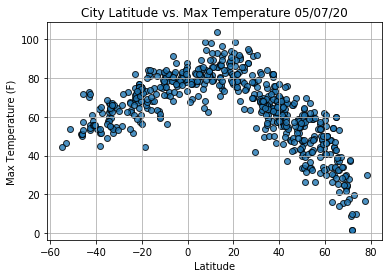

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

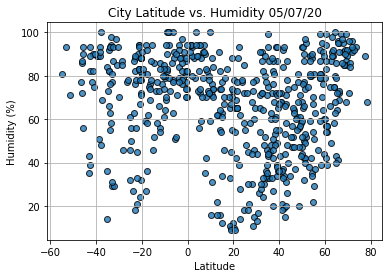

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

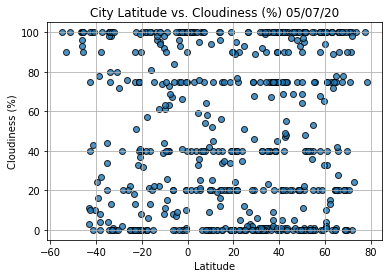

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()